Reem Alsharabi S20106353

[Data source ](https://www.kaggle.com/datasets/contactprad/bike-share-daily-data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Explore Data

In [17]:
df = pd.read_csv("bike_sharing_daily.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.shape

(731, 16)

In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Data Wrangling

missing values

In [21]:
missing_values = df.isnull().sum()

for column in df.columns:
    if missing_values[column] > 0:
        df[column].fillna(df[column].mean(), inplace=True)

This function performs data type conversions and value mappings on specific columns of a DataFrame.

It converts the 'dteday' column to the datetime data type,
several columns to the category data type,
and 'holiday' and 'workingday' columns to the boolean data type.

It also maps encoded values in the 'season', 'weekday', and 'weathersit' columns to more descriptive labels.

In [22]:
def fix_datatypes(df):
    df['dteday'] = df['dteday'].astype('datetime64')
    df.loc[:,'season':'mnth'] = df.loc[:,'season':'mnth'].astype('category')
    df[['holiday','workingday']] = df[['holiday','workingday']].astype('bool')
    df[['weekday','weathersit']] = df[['weekday','weathersit']].astype('category')

    mapping_season = {1:"1_Winter", 2:"2_Spring", 3:"3_Summer", 4:"4_Fall" }
    mapping_weekdays = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday",
                        4:"Thursday", 5:"Friday", 6:"Saturday"}
    mapping_weather = {1:"good", 2:"medium", 3:"poor", 4:"very_poor" }

    df["season"] = df.season.map(mapping_season)
    df["weekday"] = df.weekday.map(mapping_weekdays)
    df["weathersit"] = df.weathersit.map(mapping_weather)

    return df

In [23]:
df = fix_datatypes(df)

scaling numeric features to ensure they are on a similar scale

In [24]:
# Standardization
scaler = StandardScaler()
df[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(df[['temp', 'atemp', 'hum', 'windspeed']])

# Normalization
scaler = MinMaxScaler()
df[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(df[['temp', 'atemp', 'hum', 'windspeed']])

save the data after performing data wrangling

In [10]:
df.to_csv('wrangled_data.csv', index=False)

# EDA

## Descriptive Statistics

summary statistics of numerical column

In [11]:
df.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.543594,0.518864,0.645649,0.346536,848.176471,3656.172367,4504.348837
std,211.165812,0.228091,0.213909,0.146457,0.159766,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,22.000000
25%,183.500000,0.346343,0.339674,0.534704,0.232045,315.500000,2497.000000,3152.000000
50%,366.000000,0.547268,0.535113,0.644388,0.326928,713.000000,3662.000000,4548.000000
75%,548.500000,0.743002,0.695083,0.750857,0.434622,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,1.000000,1.000000,1.000000,3410.000000,6946.000000,8714.000000


Counting Cases

In [12]:
df['weathersit'].value_counts()

good      463
medium    247
poor       21
Name: weathersit, dtype: int64

In [13]:
pd.crosstab(df.weathersit, df.season)

season,1_Winter,2_Spring,3_Summer,4_Fall
weathersit,,,,
good,111,113,136,103
medium,66,68,48,65
poor,4,3,4,10


The crosstab function is used to examine the relationship between weather conditions (weathersites) and seasons. The analysis indicates that good weathersites occur more frequently in the summer, while poor weathersites are more prevalent in the winter. However, due to the limited data available, it is recommended to gather additional weather data for D.C. or consult a meteorologist for a more reliable assessment of the weather patterns.

Plotting Processes

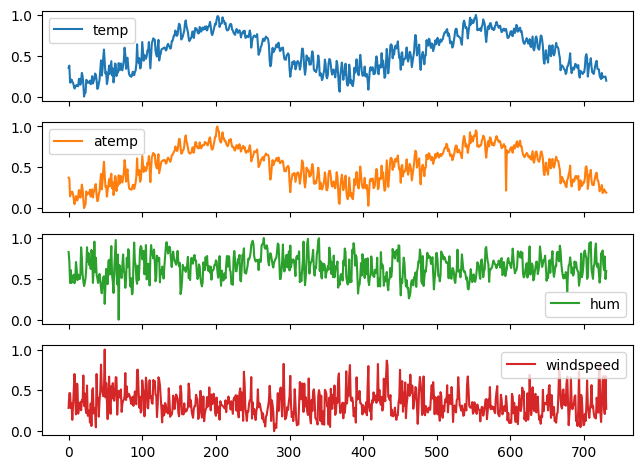

In [14]:
df.loc[:,'temp':'windspeed'].plot(subplots=True)
plt.xlabel("")
plt.tight_layout()
plt.show()

The variables "temp" and "atemp" exhibit a high correlation, except for one data point in August 2012.

Furthermore, the temperature variable shows a pattern (seasonal trend), while the humidity and windspeed variables appear to have some noise in their patterns.

## Data Visualization

Timeseries plot of the count of bikes that were rented per day.

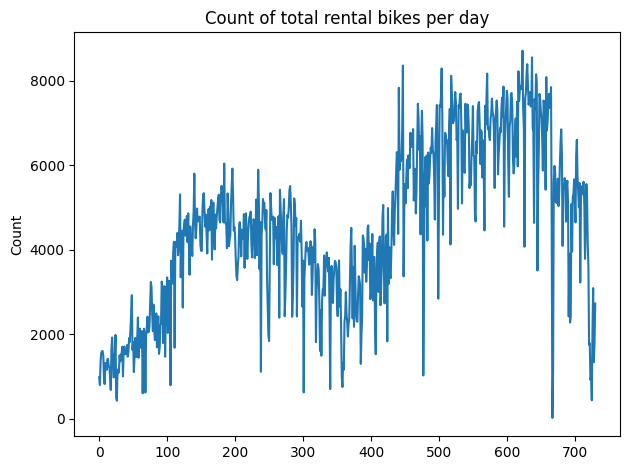

In [26]:
df.cnt.plot(title = "Count of total rental bikes per day")
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Let's aggregate the bike count data on a monthly basis to obtain a clearer understanding of the overall trend in bike usage throughout the year.

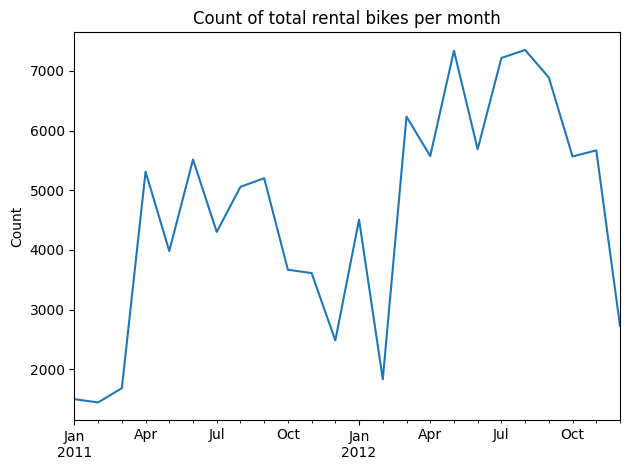

In [29]:
df.set_index('dteday', inplace=True) # using the dates as index

df.asfreq('M').cnt.plot(title = "Count of total rental bikes per month")
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

This reveals that there is a noticeable decrease in bike usage during February.

Visualizing the proportion of registered and unregistered users over time

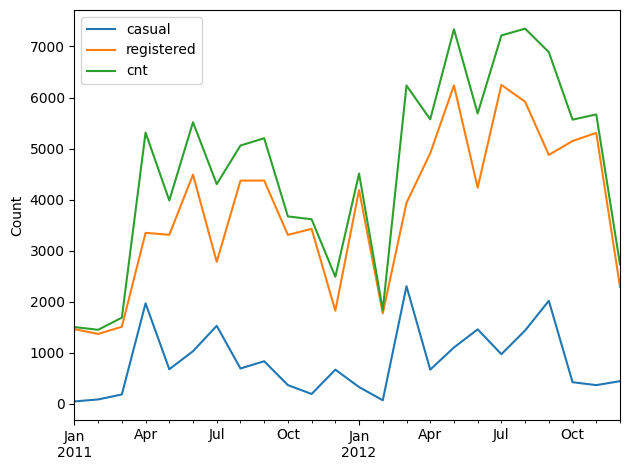

In [30]:
df[['casual','registered','cnt']].asfreq('M').plot()
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In January, the number of casual users and their proportion compared to registered users is low.

However, in the spring, the proportion of casual users increases.

Notably, there is an interesting gap between the total number of users and rentals generated by registered users.

This gap is higher during the summer months and lower in the winter.

Outliers

In [31]:
df[['casual','registered','cnt']].describe()

,casual,registered,cnt
count,731.000000,731.000000,731.000000
mean,848.176471,3656.172367,4504.348837
std,686.622488,1560.256377,1937.211452
min,2.000000,20.000000,22.000000
25%,315.500000,2497.000000,3152.000000
50%,713.000000,3662.000000,4548.000000
75%,1096.000000,4776.500000,5956.000000
max,3410.000000,6946.000000,8714.000000


On average, registered users rent four times more bikes than casual users.

The monthly variation in bike rentals shows different patterns throughout the year.

However, when looking at the daily variation, it is apparent that registered users exhibit higher fluctuations, as indicated by their higher standard deviation, compared to casual users.

In [32]:
df[df.cnt == df.cnt.min()]

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2012-10-29,668,4_Fall,1,10,False,Monday,True,poor,0.474582,0.472982,0.904884,0.692286,2,20,22


In [34]:
df[df.cnt == df.cnt.max()]

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2012-09-15,624,3_Summer,1,9,False,Saturday,False,good,0.684333,0.66524,0.515853,0.464116,3160,5554,8714


These two days could be outlires. Probabily due to an event happening that exact day leading to this change of rentals.

**Conclusion 1/2:**

Registered and casual users display different behaviors in terms of bike rentals.

On average, registered users rent four times more bikes than casual users.

There is a clear seasonal effect and an increasing trend when analyzing rentals on a monthly basis. However, these factors do not account for all the variance observed in daily bike rentals. Other variables or interactions between variables are likely responsible for the remaining unexplained variance.

This calls for further exploration and the development of theories to identify the factors that contribute to the variations in daily bike rentals.

## Exploratory Data Analysis

### Mean

The overall mean of rentals per day for all observations serves as our benchmark.

By grouping the data based on weathersits and calculating the mean rentals per day for each group, we can assess whether there is a noticeable difference in bike rentals across different weather conditions.

This analysis will provide insights into the relationship between weather and bike usage.

In [36]:
df.groupby('weathersit')['cnt'].mean()

weathersit
good      4876.786177
medium    4035.862348
poor      1803.285714
Name: cnt, dtype: float64

It is reasonable to expect that people are more likely to use a bike when the weather is better.

Now, by calculating monthly means, we can gain insights into the average behavior and patterns exhibited by the variables over time. This analysis can help us identify any noticeable trends, seasonal variations, or other patterns that may exist within the data.

In [37]:
df.resample('M').cnt.mean()

dteday
2011-01-31    1231.903226
2011-02-28    1721.964286
2011-03-31    2065.967742
2011-04-30    3162.333333
2011-05-31    4381.322581
2011-06-30    4783.733333
2011-07-31    4559.387097
2011-08-31    4409.387097
2011-09-30    4247.266667
2011-10-31    3984.225806
2011-11-30    3405.566667
2011-12-31    2816.870968
2012-01-31    3120.774194
2012-02-29    3556.448276
2012-03-31    5318.548387
2012-04-30    5807.466667
2012-05-31    6318.225806
2012-06-30    6761.000000
2012-07-31    6567.967742
2012-08-31    6919.451613
2012-09-30    7285.766667
2012-10-31    6414.225806
2012-11-30    5088.800000
2012-12-31    3990.741935
Freq: M, Name: cnt, dtype: float64

Let's try with seasons,

In [38]:
df.groupby('season')['cnt'].mean()

season
1_Winter    2604.132597
2_Spring    4992.331522
3_Summer    5644.303191
4_Fall      4728.162921
Name: cnt, dtype: float64

Observations here align with expectations. On an average summer day, more bikes were rented compared to an average day in the winter.

Now let's compare working days and weekends

In [39]:
df.groupby('workingday')['cnt'].mean()

workingday
False    4330.168831
True     4584.820000
Name: cnt, dtype: float64

Holidays

In [40]:
df.groupby('holiday')['cnt'].mean()

holiday
False    4527.104225
True     3735.000000
Name: cnt, dtype: float64

During holidays, there was a lower number of bike rentals compared to regular days.

Let's try combinations of features, such as weather conditions and holidays

In [41]:
df.groupby(['holiday','weathersit'])['cnt'].mean()

holiday  weathersit
False    good          4905.154018
         medium        4061.684647
         poor          1803.285714
True     good          4029.533333
         medium        2998.666667
         poor                  NaN
Name: cnt, dtype: float64

It appears that there were no bike rentals on poor weather days when they coincided with holidays.

Let's combine working days and seasons

In [42]:
df.groupby(['workingday','season'])['cnt'].mean()

workingday  season  
False       1_Winter    2257.098361
            2_Spring    5142.428571
            3_Summer    5474.666667
            4_Fall      4606.210526
True        1_Winter    2780.541667
            2_Spring    4926.664062
            3_Summer    5718.114504
            4_Fall      4785.611570
Name: cnt, dtype: float64

Rentals are generally higher on working days compared to non-working days, except during the summer season where non-working days exhibit slightly higher average rentals.